# Regression

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("kc_house_data.csv")

## EDA

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df["zipcode"] = df["zipcode"].astype("category")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21613 non-null  int64   
 1   date           21613 non-null  object  
 2   price          21613 non-null  float64 
 3   bedrooms       21613 non-null  int64   
 4   bathrooms      21613 non-null  float64 
 5   sqft_living    21613 non-null  int64   
 6   sqft_lot       21613 non-null  int64   
 7   floors         21613 non-null  float64 
 8   waterfront     21613 non-null  int64   
 9   view           21613 non-null  int64   
 10  condition      21613 non-null  int64   
 11  grade          21613 non-null  int64   
 12  sqft_above     21613 non-null  int64   
 13  sqft_basement  21613 non-null  int64   
 14  yr_built       21613 non-null  int64   
 15  yr_renovated   21613 non-null  int64   
 16  zipcode        21613 non-null  category
 17  lat            21613 non-null  

In [8]:
df.shape

(21613, 21)

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406


In [11]:
abs(df.corr()["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

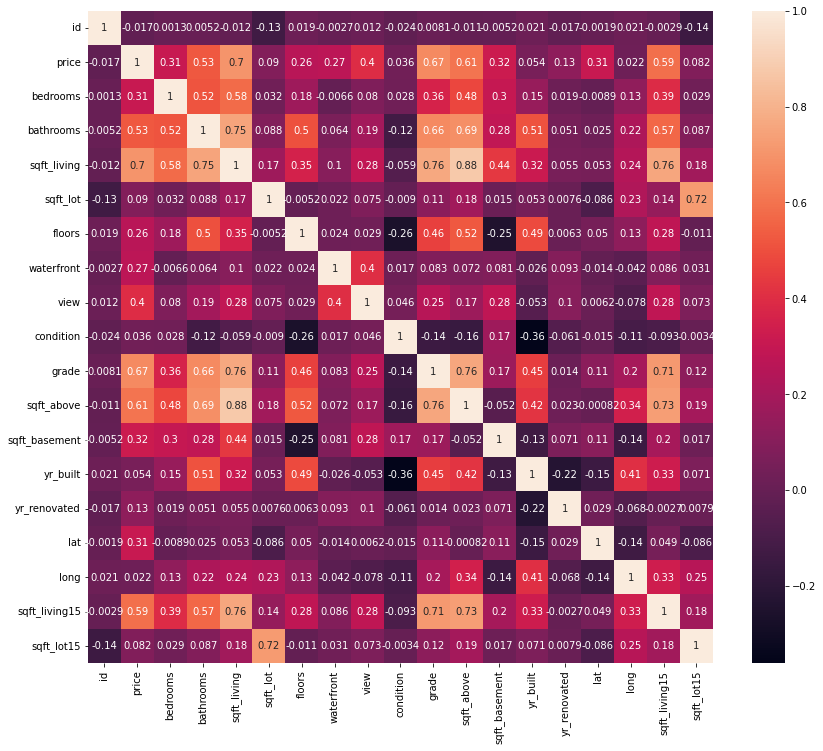

In [13]:
ax = plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(), annot=True)

In [14]:
df["age"] = 2022 - df["yr_built"]

In [15]:
abs(df.corr()["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
age              0.054012
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [16]:
x = df[["sqft_living","grade","sqft_above","sqft_living15", "bathrooms", 
        "view", "sqft_basement", "bedrooms", "floors", "waterfront","age"]] # cor>20 and cor<90

In [17]:
x.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,floors,waterfront,age
0,1180,7,1180,1340,1.00,0,0,3,1.0,0,67
1,2570,7,2170,1690,2.25,0,400,3,2.0,0,71
2,770,6,770,2720,1.00,0,0,2,1.0,0,89
3,1960,7,1050,1360,3.00,0,910,4,1.0,0,57
4,1680,8,1680,1800,2.00,0,0,3,1.0,0,35


In [18]:
y = df[["price"]]

In [19]:
y.shape

(21613, 1)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17290, 11), (4323, 11), (17290, 1), (4323, 1))

In [23]:
lr = LinearRegression()
regmodel = lr.fit(x_train, y_train)

In [24]:
y_pretest = regmodel.predict(x_test)
y_pretest

array([[479131.92351389],
       [319779.12923288],
       [159631.11449289],
       ...,
       [418016.55205393],
       [382408.40868234],
       [313850.51912546]])

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
(mean_squared_error(y_test, y_pretest)) ** 0.5

206956.60977675795

In [27]:
r2_score(y_test, y_pretest)

0.6686261729221944

# ------

In [28]:
def confidence_interval(df_col, n):
    mean = df_col.mean()
    std = df_col.std()
    return mean-n*std, mean+n*std

l,u = confidence_interval(df["price"], 2)
df = df[(df["price"]< u) & (df["price"]>l)]

l,u = confidence_interval(df["bathrooms"], 2)
df = df[(df["bathrooms"]< u) & (df["bathrooms"]>l)]
l,u = confidence_interval(df["bedrooms"], 2)
df = df[(df["bedrooms"]< u) & (df["bedrooms"]>l)]

l,u = confidence_interval(df["sqft_living"], 2)
df = df[(df["sqft_living"]> l) & (df["sqft_living"]< u)]
l,u = confidence_interval(df["sqft_above"], 2)
df = df[(df["sqft_above"]> l) & (df["sqft_above"]< u)]
l,u = confidence_interval(df["sqft_living15"], 2)
df = df[(df["sqft_living15"]> l) & (df["sqft_living15"]< u)]
l,u = confidence_interval(df["sqft_basement"], 2)
df = df[(df["sqft_basement"]> l) & (df["sqft_basement"]< u)]

#df = df[df["sqft_above"]< 3000]
#df = df[df["sqft_living15"]< 3000]
#df = df[df["sqft_basement"]< 400]

df["bedrooms"] = df["bedrooms"] ** 2
df["bathrooms"] = df["bathrooms"] ** 2
df["age"] = df["age"] ** 2

df["view_updated"] = 0
df.loc[(df["view"]>0) | (df["waterfront"]>0), ["view_updated"]] = df["view"] + df["waterfront"]

df["sqft"] = (df["sqft_living"] + df["sqft_above"] + df["sqft_living15"] + df["sqft_basement"])

abs(df.corr()["price"]).sort_values(ascending=False)

price            1.000000
grade            0.526553
sqft             0.506866
sqft_living      0.495534
lat              0.468917
sqft_living15    0.407213
sqft_above       0.375734
bathrooms        0.336722
floors           0.228828
view             0.227862
view_updated     0.227687
sqft_basement    0.227401
bedrooms         0.193251
age              0.120198
yr_renovated     0.113043
waterfront       0.082792
condition        0.082598
yr_built         0.068714
long             0.059748
sqft_lot         0.030425
id               0.030216
sqft_lot15       0.008486
Name: price, dtype: float64

In [29]:
#x, y = df[["sqft_living","grade","sqft_above","sqft_living15", "bathrooms", 
#        "view_updated", "sqft_basement", "bedrooms", "floors","age", "zipcode"]], df[["price"]]
x, y = df[["grade","sqft", "lat","bathrooms", "view_updated", "bedrooms", "floors","age", "zipcode"]], df[["price"]]

In [30]:
x = pd.get_dummies(x, drop_first=True)
x.sample(5)

,grade,sqft,lat,bathrooms,view_updated,bedrooms,floors,age,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
14525,6,2700,47.3634,1.0000,0,9,1.0,2704,0,0,...,0,0,0,0,0,0,0,0,0,0
20673,8,4360,47.6853,3.0625,0,4,2.0,196,0,0,...,0,0,0,0,0,0,0,0,0,0
10672,8,5910,47.7412,6.2500,0,25,1.0,3969,0,0,...,0,0,0,0,0,0,0,0,0,0
4848,9,6440,47.4347,7.5625,0,9,2.0,576,0,0,...,0,0,0,0,0,0,0,0,0,0
8088,7,5070,47.3001,6.2500,0,16,1.0,1849,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 13)
lr = LinearRegression()
regmodel = lr.fit(x_train, y_train)
y_pretest = regmodel.predict(x_test)

In [32]:
(mean_squared_error(y_test, y_pretest)) ** 0.5

84139.44983153472

In [33]:
r2_score(y_test, y_pretest)

0.7980101618629563

# ridge lasso

In [34]:
# LR
from sklearn.linear_model import Ridge, Lasso
import warnings
warnings.filterwarnings('ignore')

In [35]:
R = Ridge()
R.fit(x_train, y_train)
y_pred_ridge = R.predict(x_test)

In [36]:
(mean_squared_error(y_test, y_pred_ridge)) ** 0.5

84517.62107749243

In [37]:
r2_score(y_test, y_pred_ridge)

0.7961903636118641

In [38]:
# Lasso
L = Lasso()
L.fit(x_train, y_train)
y_pred_lasso = L.predict(x_test)

In [39]:
(mean_squared_error(y_test, y_pred_lasso)) ** 0.5

84178.37395971718

In [40]:
r2_score(y_test, y_pred_lasso)

0.7978232317851184

In [41]:
from sklearn.linear_model import ElasticNet
E = ElasticNet(l1_ratio= 0.9)

In [42]:
E.fit(x_train, y_train)
y_pred_elastic = E.predict(x_test)

In [43]:
(mean_squared_error(y_test, y_pred_elastic)) ** 0.5

122163.49856081262

In [44]:
r2_score(y_test, y_pred_elastic)

0.5741926940894644